In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import numpy as np
path='/content/drive/My Drive/dataset/Clothing Reviews.csv'
df=pd.read_csv(path)


In [83]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [84]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [85]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [86]:
df.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [87]:
len(df)

23486

In [88]:
df.describe()

,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,43.198544,4.196032,0.822362,2.535936
std,6779.968547,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,99.000000,5.000000,1.000000,122.000000


In [89]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [90]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [91]:
df['Recommended IND'].unique()

array([1, 0])

In [92]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [93]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Values according to rating

In [95]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

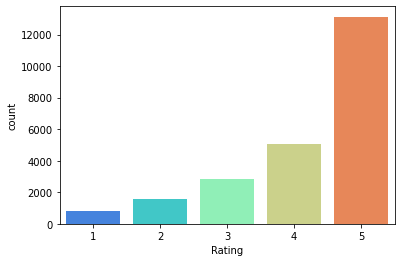

In [96]:
sns.countplot(x='Rating', data=df, palette='rainbow')

13131 items are given 5 ratings.

Rating based on percentage.

In [97]:
df["Rating"].dtypes

dtype('int64')

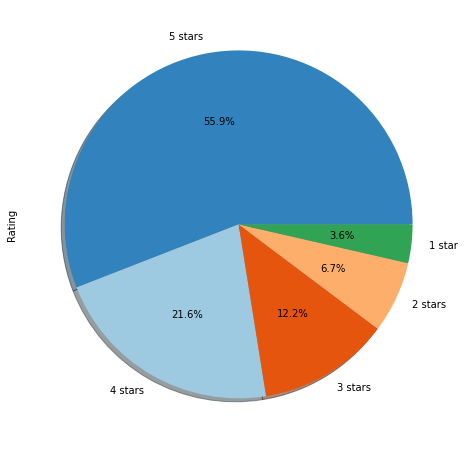

In [98]:
plt.figure(figsize=(8,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["Rating"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, labels=labels, colors = cmap(np.arange(5)*2)) #this kind of cmap can be used only if there are numeric values in the column

#  Recommended Index. (1- Yes, 0-No)

In [99]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

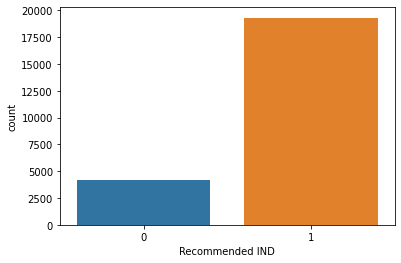

In [100]:
sns.countplot(x="Recommended IND", data=df)

***Ratings and division name based on Index***

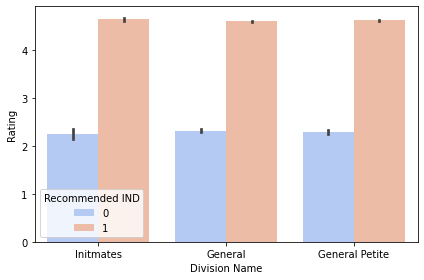

In [101]:
sns.barplot(x="Division Name", y="Rating", data=df, palette='coolwarm',hue='Recommended IND')
plt.tight_layout()

# Items sold according to Department,Class and Division

In [102]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [103]:
df['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

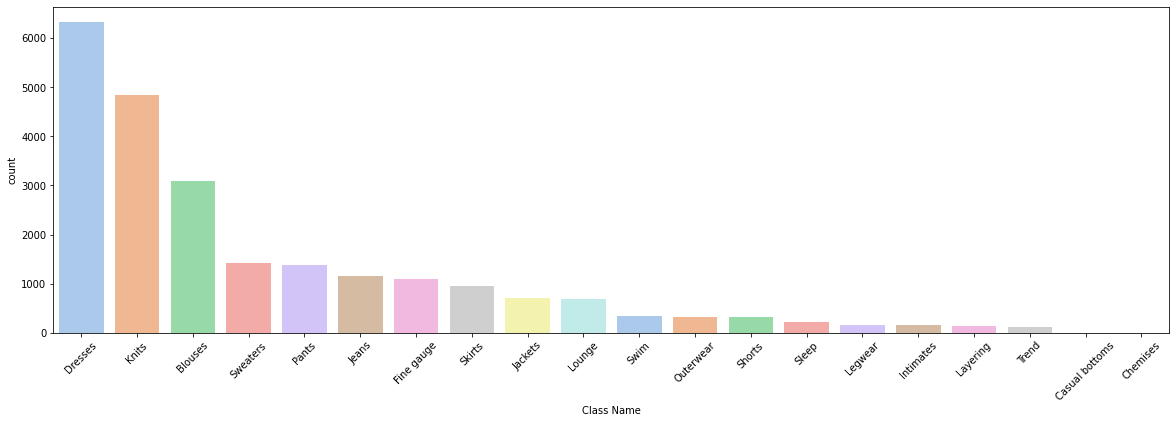

In [104]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df, palette='pastel', order=df['Class Name'].value_counts().index)
plt.xticks(rotation = 45)

Dresses are sold more, which are around 6400 units and then kints around 5000 units.

***Classifying classes based on department name***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

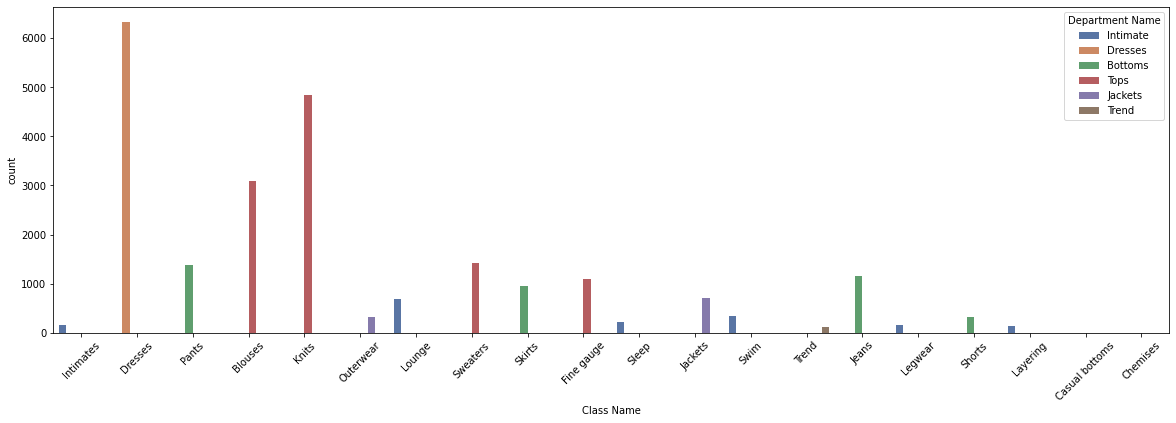

In [105]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df, palette='deep', hue='Department Name')
plt.xticks(rotation = 45)

Through the plot we can infer that a large number of Dresses fall on Dresses category, Blouses, knits, sweaters, fine gauge falls on tops category

***Departments in Each Division***

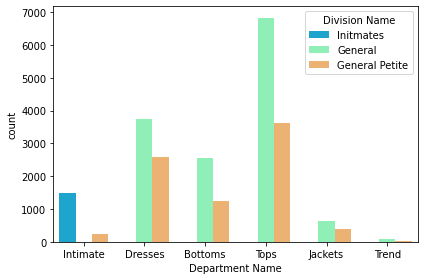

In [106]:
sns.countplot(x="Department Name", data=df, palette='rainbow', hue='Division Name')
plt.tight_layout()

Dresses, bottoms, Tops comes in general division

***Department based on Rating***

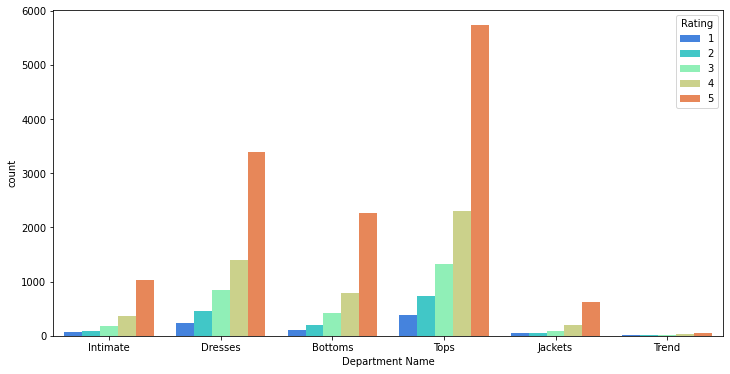

In [107]:
plt.figure(figsize = (12,6))
sns.countplot(x='Department Name',data=df,hue='Rating',palette='rainbow')

Tops are on high rating of 5 and dress are followed by Tops

***Ratings based on Recommended Index***

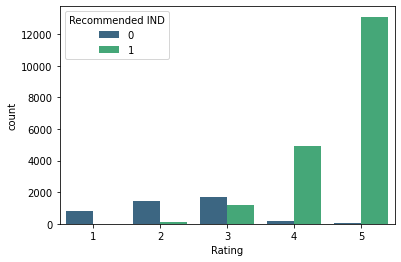

In [108]:
sns.countplot(x='Rating',data=df,hue='Recommended IND',palette='viridis')

***Rating based on Division Name***

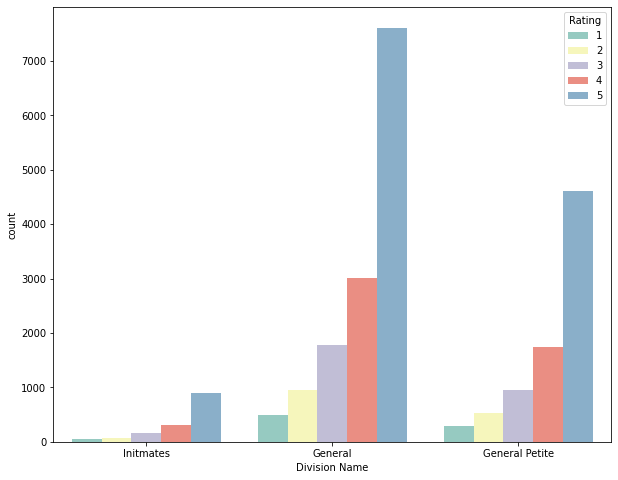

In [109]:
plt.figure(figsize=(10,8))
sns.countplot(x='Division Name',data=df,hue='Rating',palette='Set3')


 **Categoring Classes based on Ratings**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

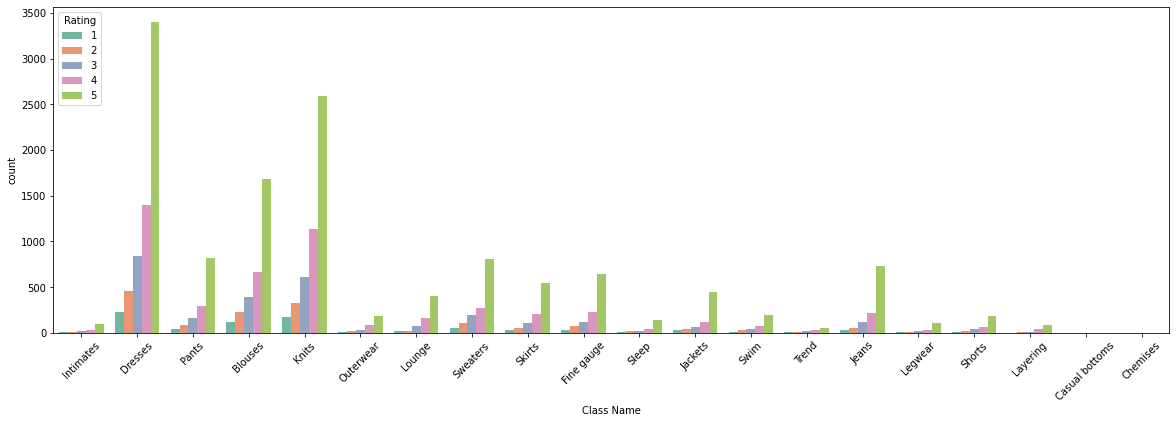

In [110]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df,hue='Rating',palette='Set2')
plt.xticks(rotation = 45)

# **Age of customers**

In [111]:
df['Age'].nunique()

77

In [112]:
df['Age'].max()

99

In [113]:
df['Age'].min()

18

In [114]:
df['Age'].mean()

43.198543813335604

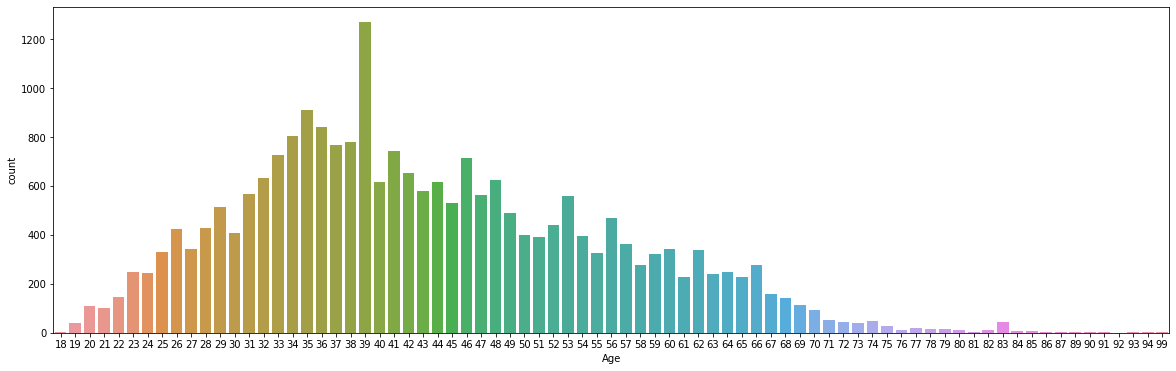

In [115]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



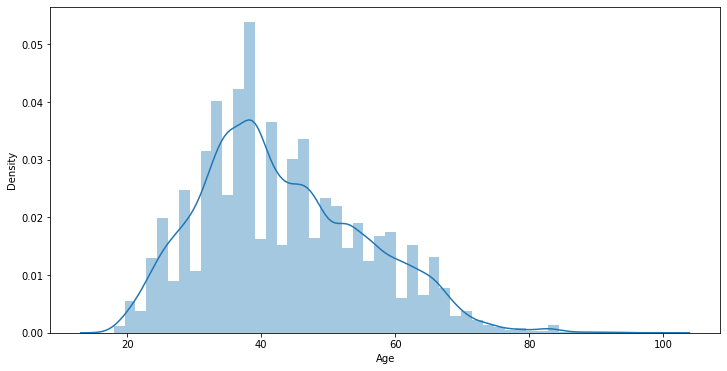

In [116]:
plt.figure(figsize = (12,6))
sns.distplot(df['Age'],bins=50);

***Customers and Rating***

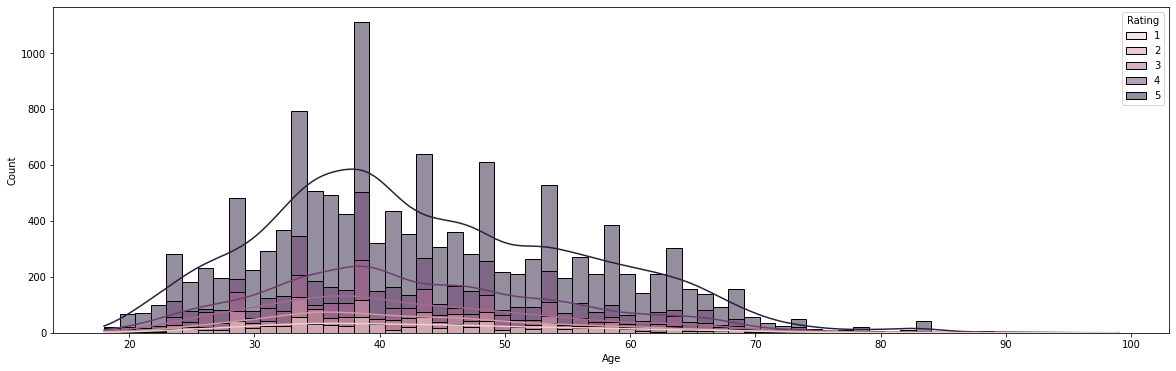

In [117]:
plt.figure(figsize = (20,6))
sns.histplot( data=df, x= 'Age', bins='auto', hue='Rating', kde=True) 

<Figure size 1440x432 with 0 Axes>

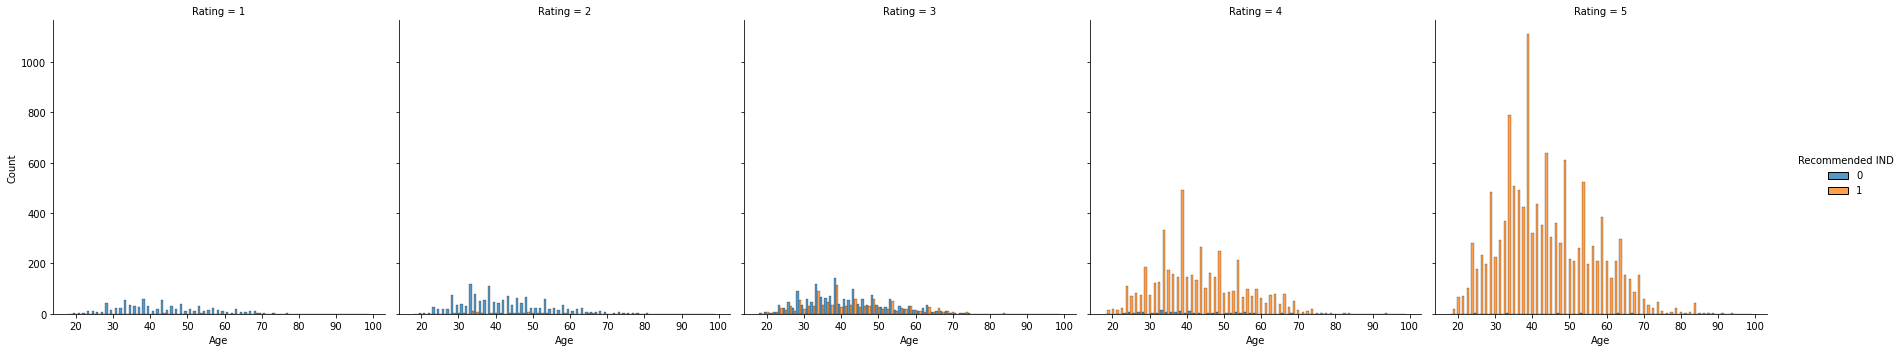

In [118]:
plt.figure(figsize = (20,6))
sns.displot(df, x="Age", col="Rating", multiple="dodge", hue='Recommended IND')

*Most of the customers are around age of 43 and they have given rating of 5 mostly*

In [119]:
#for loop for ages

# Sentiment Analysis

In [120]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [121]:
df.dtypes

Unnamed: 0                  int64
Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [122]:
df['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [123]:
df['Review Text'].dtypes

dtype('O')

Removing the rows that has null values

In [124]:
df = df[~df['Review Text'].isnull()]

In [125]:
df['length']=df['Review Text'].apply(len)

In [126]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


Length after removing the rows where Review Text is null

In [127]:
len(df)

22641

Text(0.5, 1.0, 'message length')

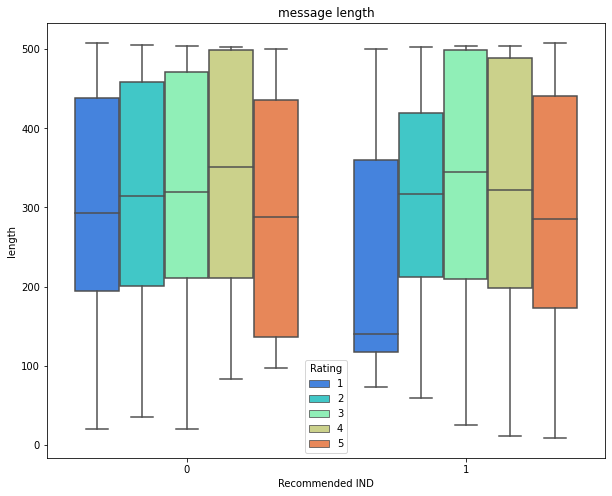

In [128]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Recommended IND',y='length',data=df,hue='Rating',palette='rainbow')
plt.title('message length')

In [129]:
df.length.describe()


count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: length, dtype: float64

maximum length is 508.

In [130]:
df[df['length'] == 508]['Review Text'].iloc[0]


'I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl'

**Removing puntuations**

In [131]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review Text']=df['Review Text'].apply(lambda x: remove_punctuation(x))
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


**Text blob for polarity**

In [132]:
from textblob import TextBlob
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


In [133]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [134]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750


In [135]:
df['Polarity'].min()

-0.9750000000000001

In [136]:
import plotly.express as px
px.histogram(df, x='Polarity',color="Rating", opacity = 0.5)

In [137]:
def getAnalysis(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'
   

In [138]:
 df['TextBlob_Analysis']=df['Polarity'].apply(getAnalysis)


In [139]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive


In [140]:
polarity_plot=df['TextBlob_Analysis'].value_counts()

In [141]:
polarity_plot

Positive    21213
Negative     1333
Neutral        95
Name: TextBlob_Analysis, dtype: int64

In [142]:
positive= 21213/len(df)*100
negative= 1333/len(df)*100
neutral= 95/len(df)*100

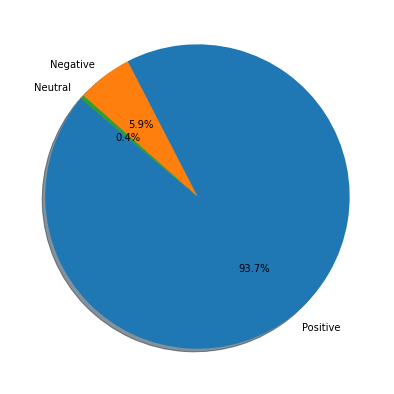

In [143]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

In [144]:
df['Polarity'].dtypes

dtype('float64')

['Positive', 'Negative', 'Neutral']


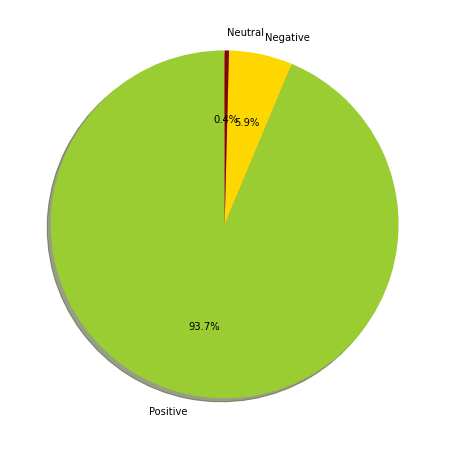

In [145]:
plt.figure(figsize=(8,8))
topics=['Positive','Negative','Neutral']
percentage=[93.7,5.9,0.4]
sizes=percentage
labels=list(topics)
print(labels)
colors = ['yellowgreen',  'gold',  'darkred']
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.show()

In [146]:
#review_type = {"Positive": 2, "Neutral": 1, "Negative": 0}
#df["Review Type"] = df["Review Type"].map(review_type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



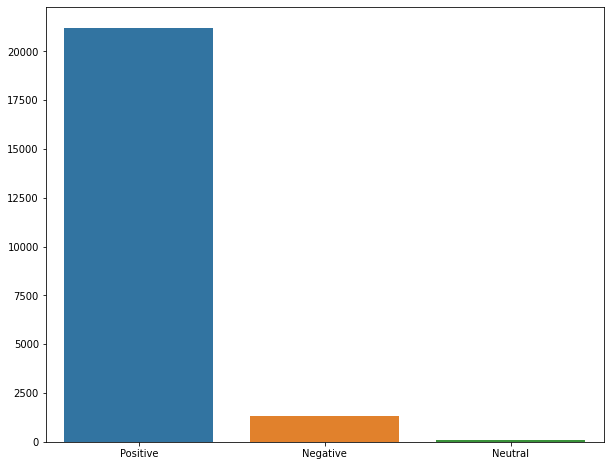

In [147]:
plt.figure(figsize=(10,8))
sns.barplot(polarity_plot.index, polarity_plot.values)

In [148]:
 #Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Encoded_value']= label_encoder.fit_transform(df['TextBlob_Analysis'])
  
df['Encoded_value'].unique()

array([2, 0, 1])

In [149]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive,2


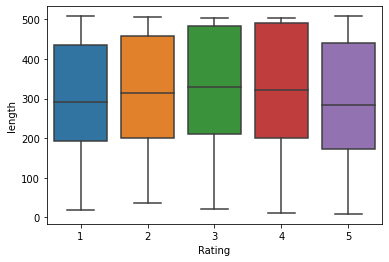

In [150]:
sns.boxplot(x="Rating", y="length", data=df,)

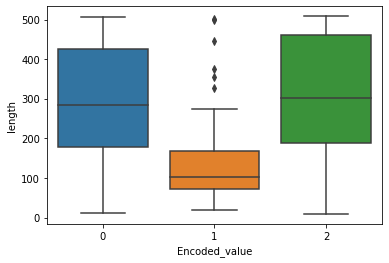

In [151]:
sns.boxplot(x="Encoded_value", y="length", data=df,)

# Bag Of Words

In [153]:
df['Polarity'].dtypes

dtype('float64')

In [154]:
df['Polarity'] = df['Polarity'].astype(str)

In [155]:
df['Review Text'] = df['Review Text'].astype(str)

In [164]:
import numpy as np

In [168]:
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [173]:
df['Review Text'].head(5).apply(text_process)


0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Review Text, dtype: object

In [174]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.6333333333333333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.31875000000000003,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.07639233954451345,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.5,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.39375,Positive,2


In [175]:
from sklearn.feature_extraction.text import CountVectorizer


*bag of words*

In [177]:
 #Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Review Text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

19807


In [189]:
message4 = df['Review Text'][3]
print(message4)

I love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments


In [190]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4751)	1
  (0, 6756)	1
  (0, 6983)	1
  (0, 7503)	1
  (0, 7835)	1
  (0, 7992)	1
  (0, 8246)	1
  (0, 9709)	1
  (0, 10572)	3
  (0, 11910)	1
  (0, 17755)	1
  (0, 19080)	1
(1, 19807)


Transforming from bow to cv

In [178]:
messages_bow = bow_transformer.transform(df['Review Text'])

In [181]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (22641, 19807)
Amount of Non-Zero occurences:  616412


In [182]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [191]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 19080)	0.141396791881
  (0, 17755)	0.23859697129059737
  (0, 11910)	0.314967954251961
  (0, 10572)	0.3935851858912826
  (0, 9709)	0.3444443377045059
  (0, 8246)	0.14813209266734195
  (0, 7992)	0.20818886815553603
  (0, 7835)	0.2662900775869557
  (0, 7503)	0.39749807304275847
  (0, 6983)	0.34976243094763304
  (0, 6756)	0.27381417614227427
  (0, 4751)	0.2425151823011209


In [183]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['good']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['fabric']])

3.5409485544981
2.706383560147774


In [184]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(22641, 19807)


In [186]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['TextBlob_Analysis'])

In [192]:
print('expected:', df.TextBlob_Analysis[3])
print('predicted:', spam_detect_model.predict(tfidf4)[0])

expected: Positive
predicted: Positive


In [195]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [196]:
from sklearn.metrics import classification_report
print (classification_report(df['TextBlob_Analysis'], all_predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00      1333
     Neutral       0.00      0.00      0.00        95
    Positive       0.94      1.00      0.97     21213

    accuracy                           0.94     22641
   macro avg       0.65      0.33      0.32     22641
weighted avg       0.94      0.94      0.91     22641



*Top 20 positive words*

In [203]:
df_positive = df[df["TextBlob_Analysis"] == "Positive"]
df_negative = df[df["TextBlob_Analysis"] == "Negative"]

In [200]:
df['Polarity'].dtypes

dtype('O')

In [219]:
df_positive.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive,2
11,11,39,This dress is perfection so pretty and flattering,5,1,2,General Petite,Dresses,Dresses,51,0.250000,Positive,2


In [204]:
df_negative.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
10,10,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,336,-0.069868,Negative,0
14,14,50,This is a nice choice for holiday gatherings i...,3,1,1,General,Dresses,Dresses,500,-0.057143,Negative,0
22,22,31,First of all this is not pullover styling ther...,2,0,7,General,Dresses,Dresses,437,-0.058095,Negative,0
44,44,48,Tried this on today at my local retailer and h...,5,1,9,General,Tops,Knits,391,-0.042587,Negative,0
72,72,27,I have a short torso and this works well for m...,5,1,4,General,Tops,Blouses,500,-0.079365,Negative,0


In [205]:
df_negative['Polarity']=df_negative['Polarity'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [206]:
df_negative['Polarity']=df_negative['Polarity'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
df['Polarity']=df['Polarity'].astype(float)

In [207]:
import nltk
df_positive = df_positive[df_positive["Polarity"] >= 0.25]
df_negative = df_negative[df_negative["Polarity"] < 0]

# **`Word cloud`**

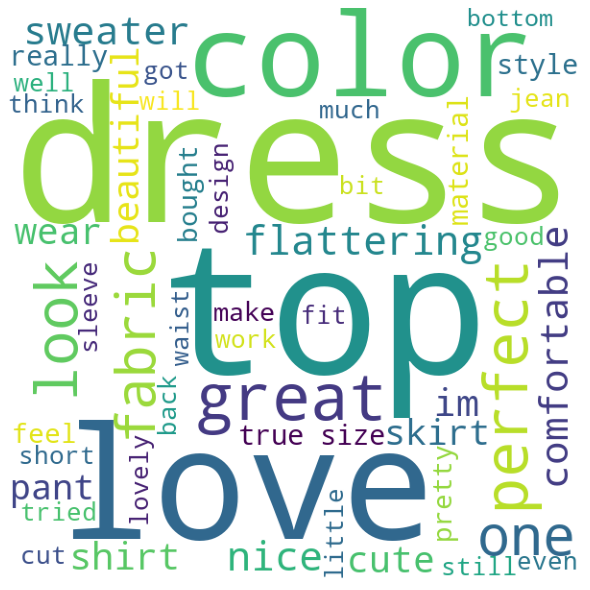

In [228]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df_positive["Review Text"]:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',max_words=50,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
#save image of word cloud
wordcloud.to_file("img/first_review.png")

# ***Ngrams***

In [232]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'

n = 2
sixgrams = ngrams(sentence.split(), n)

for grams in sixgrams:
  print (grams)


('this', 'is')
('is', 'a')
('a', 'foo')
('foo', 'bar')
('bar', 'sentences')
('sentences', 'and')
('and', 'i')
('i', 'want')
('want', 'to')
('to', 'ngramize')
('ngramize', 'it')


In [165]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from tqdm import tqdm
df.index = np.arange(len(df))
corpus = []
for i in range(len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [167]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.6333333333333333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.31875000000000003,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.07639233954451345,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.5,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.39375,Positive,2


In [ ]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)


#vectorization

In [160]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [161]:
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0)

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(X)

In [ ]:
messages_tfidf = tfidf_transformer.transform(X)
print(messages_tfidf.shape)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['Encoded_value'])

In [ ]:
#single prediction
print('predicted:', spam_detect_model.predict(messages_tfidf)[9])
print('expected:', df.Encoded_value[9])

In [ ]:
y_pred = spam_detect_model.predict(X_test)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
#classification report
from sklearn import metrics
y_pred = spam_detect_model.predict(X_test)
print("Classification report: \n" ,metrics.classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

nb_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='magenta', fmt='g', ax=ax, cmap="magma_r")
plt.title('Multinomial NB Matrix')
plt.xlabel('Y predict value')
plt.ylabel('Y test value')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))


positive , negative words


In [ ]:
df.head()

In [ ]:
df_positive = df[df["TextBlob_Analysis"] == "Positive"]
df_negative = df[df["TextBlob_Analysis"] == "Negative"]

In [ ]:
df_positive.head()

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(corpus)
top_ten = fdist.most_common(10)

In [ ]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))